In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

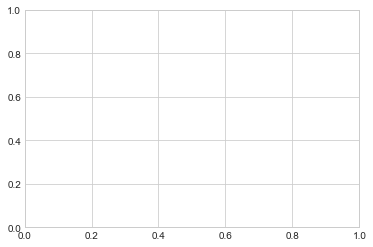

In [4]:
fig = plt.figure()
ax = plt.axes()

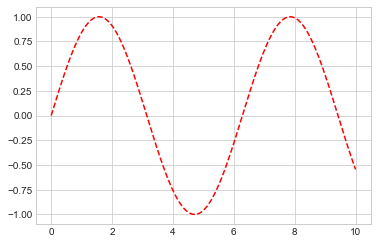

In [13]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x),'r--') 

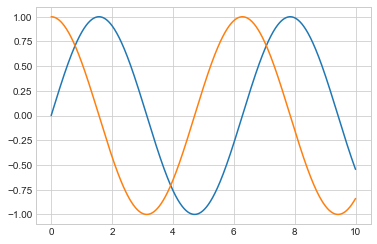

In [14]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

(0, 10)

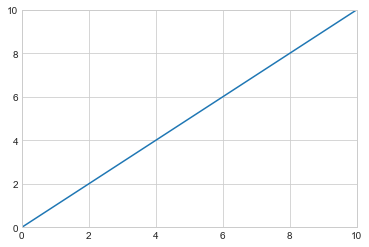

In [23]:
plt.plot(x, x/1)
plt.xlim(0, 10)
plt.ylim(0, 10)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# install stereonet and rose diagram module
pip install mplstereonet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mplstereonet

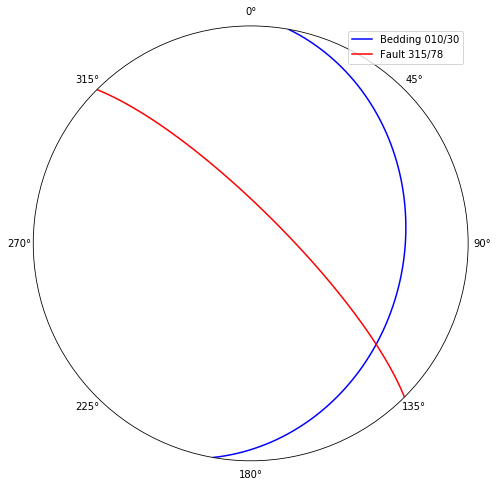

In [13]:
strike1, dip1 = 10, 30
strike2, dip2 = 315, 78

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(strike1, dip1, c='b', label='Bedding %03d/%02d' % (strike1, dip1))
ax.plane(strike2, dip2, c='r', label='Fault %03d/%02d' % (strike2, dip2))
ax.legend()

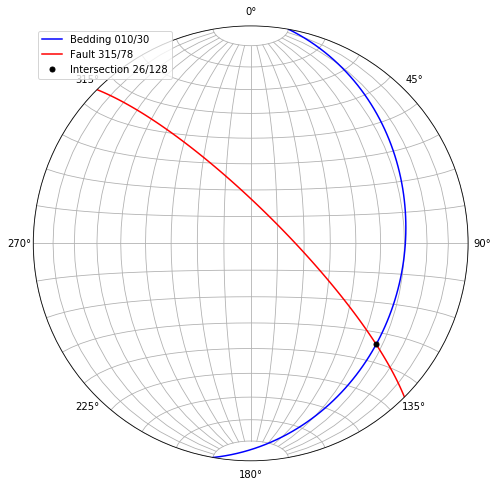

In [14]:
plunge, bearing = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)
ax.line(plunge, bearing, 'ko', markersize=5, 
        label='Intersection %02d/%03d' % (plunge, bearing))
ax.legend()
# We can also add a grid
ax.grid()
fig

In [17]:
# example = lets create some random data of fault measurements and let's analyze it using a rose diagram.

strikes = np.concatenate([np.random.randint(0, 360, 60),
                          np.random.randint(10, 60, 20),
                          np.random.randint(190, 300, 20),
                          np.random.randint(60, 90, 20),
                         ])

dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

print (strikes)
print (dips)

[342  92 105  40 180 184  69  89  61 199 135 202 146  39 115 177 191  51
 352 206 273 296 306 177   5 116 264 286 134  76 197 107 158 216 347  53
 359  46  23 195  16  65 272 301 213 116 245   6 269 291  82 337  18  26
 340  90 231 132 126 345  31  35  51  10  49  19  47  51  33  22  10  32
  11  43  23  45  49  34  33  57 243 247 228 227 227 230 223 276 261 242
 257 258 226 205 208 240 299 273 265 281  79  69  64  67  66  71  84  80
  61  80  74  60  68  69  79  64  70  77  83  68]
[36 78 68 45 76 74 31  3 74 71 60 35 68 39 71 70  7 58 28 43 41 36 41 67
 12 81 62 53 37 19 89 34 47 78 66 80 16  7  3 26 78 70 51  9  5  5 59  3
 88 18 81 78 69 39 71 60 30 18 85  8 73 74 80 71 67 65 72 78 64 88 61 74
 70 62 62 62 68 82 80 72 60 84 83 76 84 82 73 79 65 65 63 76 81 62 77 89
 62 76 73 87 69 77 76 67 71 75 80 82 60 60 76 85 63 76 73 69 74 76 85 74]


In [24]:
# Calculate the number of directions (strikes) every 10° using numpy.histogram.

bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

print (bin_edges)

print (number_of_strikes)

[ -5   5  15  25  35  45  55  65  75  85  95 105 115 125 135 145 155 165
 175 185 195 205 215 225 235 245 255 265 275 285 295 305 315 325 335 345
 355 365]
[ 0  5  6  6  4  9  6 11  9  3  0  2  3  3  1  1  1  0  4  1  4  4  2  6
  3  2  4  5  2  2  3  1  0  0  3  3  1]


In [21]:
# Sum the last value with the first value.

number_of_strikes[0] += number_of_strikes[-1]



<function print>

In [25]:
# Sum the first half 0-180° with the second half 180-360° to achieve the "mirrored behavior" of Rose Diagrams.

half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

C:\Users\ikhwan.aziz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


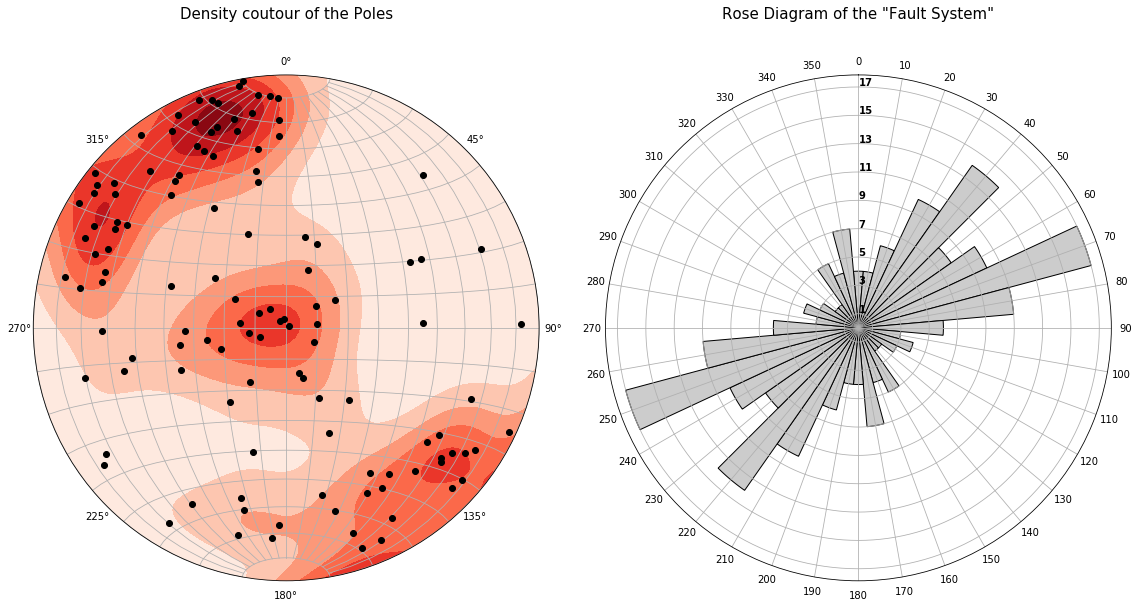

In [8]:
# Create the rose diagram.

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

fig.tight_layout()